# Lab 2: Edge detection & Hough transform

In this lab you will implement a differential geometry based edge detector that works on multiple
scales, and apply the results from this operator to detect lines with the Hough transform.

The goal of this lab is for you to understand how differential geometry based edge detection and
the Hough transform works as well as gain practical experience in applying these operations to real
data and learn the characteristics of the methods, including how important the choice of scale is
for edge detection.

As prerequisites to this lab you should have read the course material on differential operators,
edge detection and Hough transform. You should also preferably have completed and presented the
results from Lab 1.

Reporting: When reporting this lab emphasis is placed on: For parts 1-4 the experimental results and
interpretations/explanation of these, are the most central. For parts 5-6 you should also have created
well functioning and structured functions in Python, that respectively perform edge detection and
accumulation in the Hough domain.

You are recommended to use the command subplot to assemble multiple results into figures, thus
simplifying the interpretation of these. In the answer sheet write down summarizing conclusions
and compile results for the explicitly stated exercises and questions.

Advice: Read through all the lab instructions before you begin and prepare some principle solutions
before you start writing the code to Exercise 6. Read through the hints and practical suggestions
in section 6.1. Perform some simple experiments to analyze the behavior for different coordinate
systems used to access pixels in images and curves respectively

In [47]:
import numpy as np
#from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d, correlate2d
import matplotlib.pyplot as plt

from Functions import *
from gaussfft import gaussfft

from lab2 import *

$\bold{*}$ All the functions are in the file lab2.py

## 1. Difference operators

In [48]:
deltax(), deltay() # Sobel operator

(array([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

In [49]:
tools = np.load("Images-npy/few256.npy")

dxtools = convolve2d(tools, deltax(), 'valid') # Partial derivatives estimated with Sobel operator
dytools = convolve2d(tools, deltay(), 'valid') # Partial derivatives estimated with Sobel operator   
#valid returns only the valid part of the convolution, i.e. the part that is not affected by the zero-padded edges

Text(0.5, 1.0, 'tools')

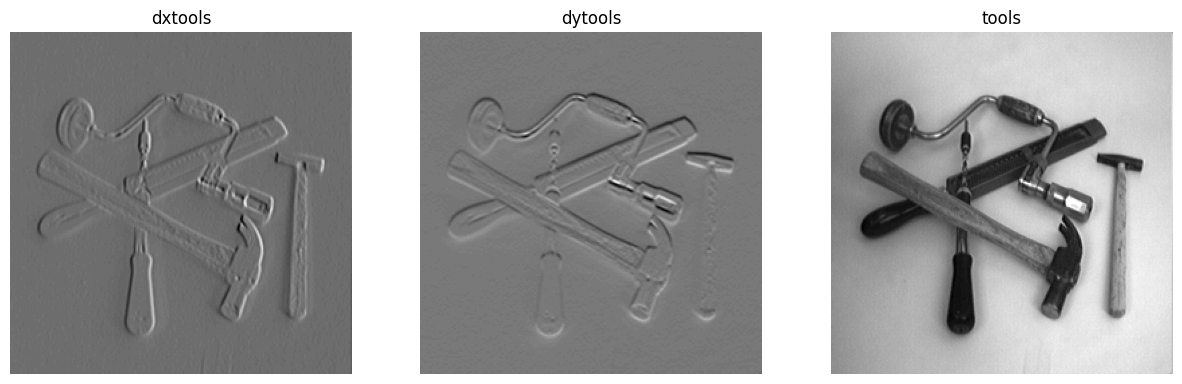

In [50]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
showgrey(dxtools,False)
plt.title('dxtools')
plt.subplot(1,3,2)
showgrey(dytools,False)
plt.title('dytools')
plt.subplot(1,3,3)
showgrey(tools,False)
plt.title('tools')

In [51]:
tools.shape, dxtools.shape, dytools.shape

((256, 256), (254, 254), (254, 254))

## 2. Point–wise thresholding of gradient magnitudes

Text(0.5, 1.0, 'Histogram of gradient magnitudes')

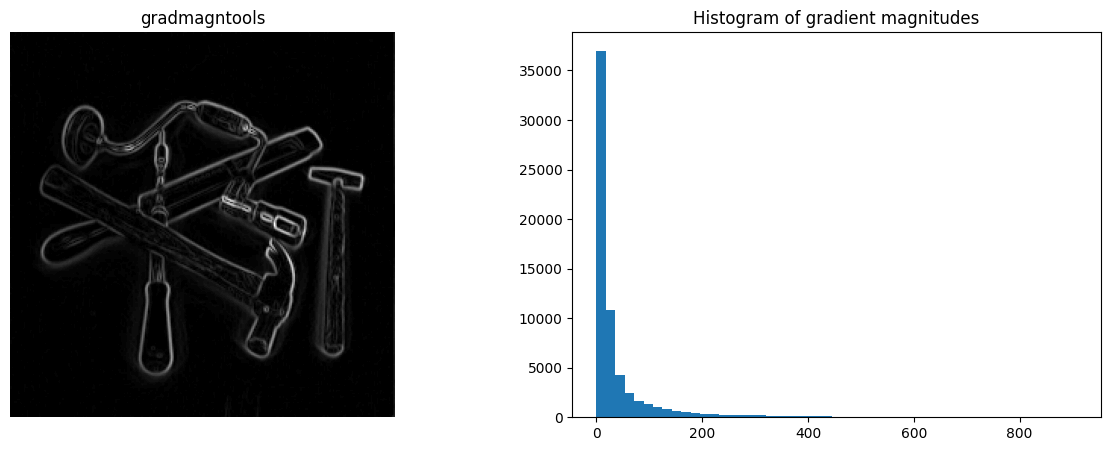

In [52]:
gradmagntools = np.sqrt(dxtools**2 + dytools**2)
# histogram of gradient magnitudes
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
showgrey(gradmagntools,False)
plt.title('gradmagntools')
plt.subplot(1,2,2)
counts, bins = np.histogram(gradmagntools, bins=50)
plt.hist(bins[:-1], len(bins), weights=counts)
plt.title('Histogram of gradient magnitudes')

Text(0.5, 1.0, 'tools')

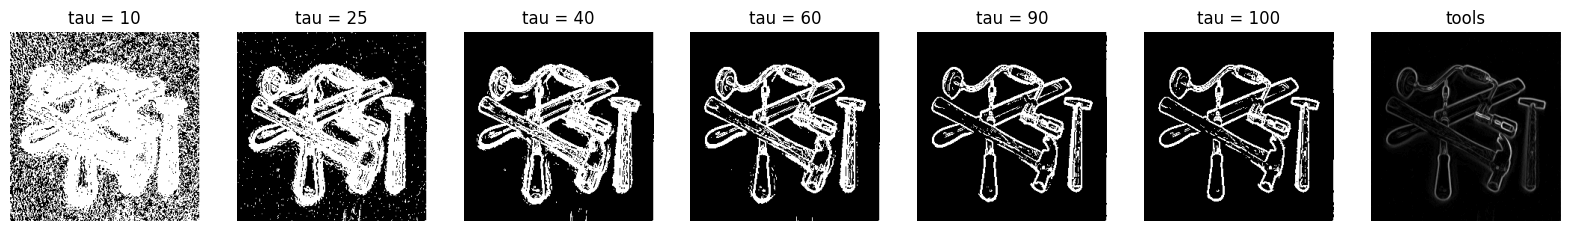

In [53]:
# Thresholding
threshold = [10, 25, 40, 60, 90, 100]
plt.figure(figsize=(20,5))
for i in range(len(threshold)):
    plt.subplot(1,len(threshold)+1,i+1)
    showgrey((gradmagntools > threshold[i]).astype(int),False)
    plt.title('tau = ' + str(threshold[i]))
    
plt.subplot(1,len(threshold)+1,len(threshold)+1)
showgrey(gradmagntools,False)
plt.title('tools')

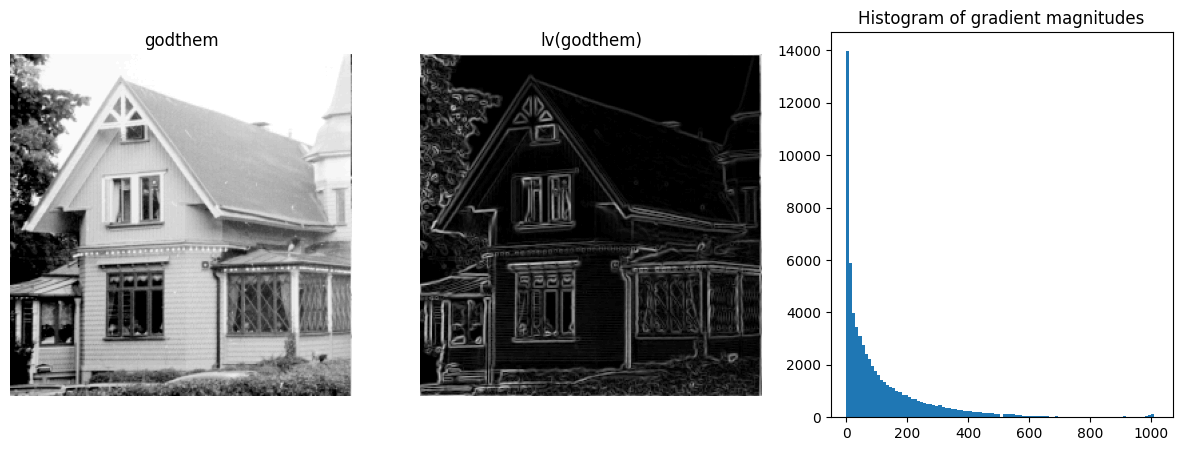

In [54]:

# Second image
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
godthem = np.load("Images-npy/godthem256.npy")
showgrey(godthem,False)
plt.title('godthem')
plt.subplot(1,3,2)
gradmagngodthem = Lv(godthem)
showgrey(gradmagngodthem,False)
plt.title('lv(godthem)')
plt.subplot(1,3,3)
counts, bins = np.histogram(gradmagngodthem, bins=100)
plt.hist(bins[:-1], len(bins), weights=counts)
plt.title('Histogram of gradient magnitudes')
plt.show()

Question 3: Does smoothing the image help to find edges?

c:\Users\andre\Documents\ProjectFolder\ComputerVision\DD2423_Python_Labs\Functions.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  im = res*(Image.astype(np.float32) - zmin)/float(range)
c:\Users\andre\Documents\ProjectFolder\ComputerVision\DD2423_Python_Labs\Functions.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(np.array(im, dtype=np.uint8), cmap)
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
c:\Users\andre\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\transforms.py:775: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


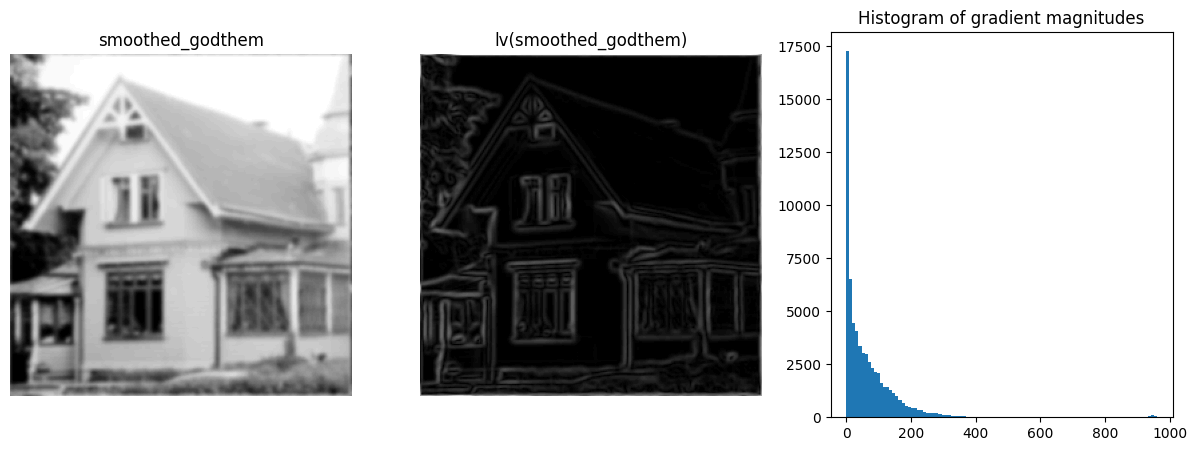

In [55]:
# image smoothing godthem
smoothed_godthem = gaussfft(godthem, 2)
gradmagn_smoothedgodthem = Lv(smoothed_godthem)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
showgrey(smoothed_godthem,False)
plt.title('smoothed_godthem')
plt.subplot(1,3,2)
showgrey(gradmagn_smoothedgodthem,False)
plt.title('lv(smoothed_godthem)')
plt.subplot(1,3,3)
counts, bins = np.histogram(gradmagn_smoothedgodthem, bins=100)
plt.hist(bins[:-1], len(bins), weights=counts)
plt.title('Histogram of gradient magnitudes')
plt.show()

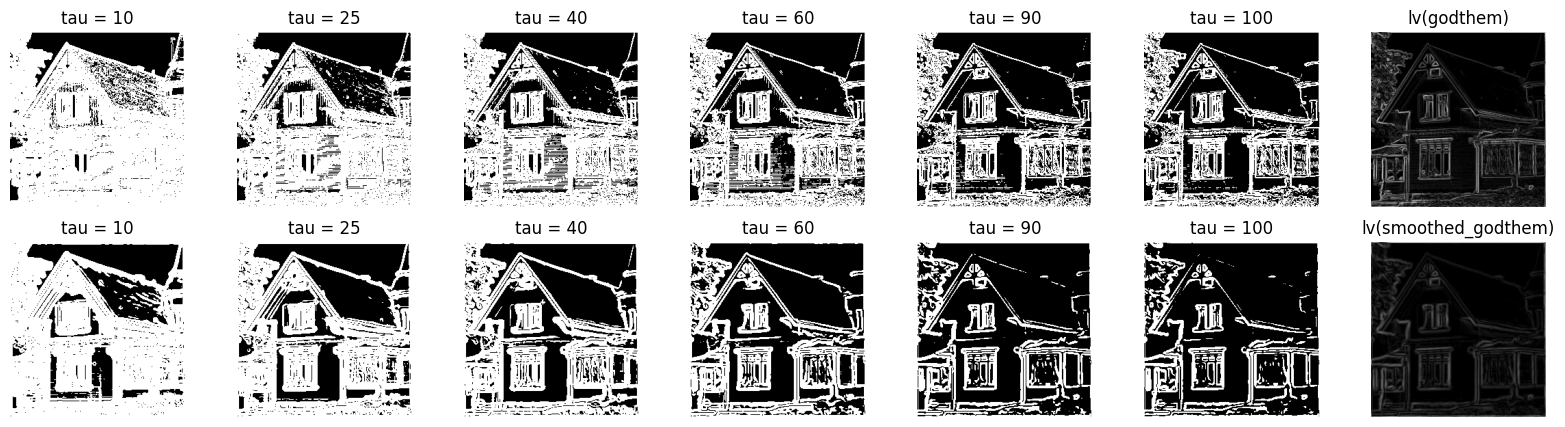

In [56]:
# thresholding on both original and smoothed image
threshold = [10, 25, 40, 60, 90, 100]
plt.figure(figsize=(20,5))
for i in range(len(threshold)):
    plt.subplot(2,len(threshold)+1,i+1)
    showgrey((gradmagngodthem > threshold[i]).astype(int),False)
    plt.title('tau = ' + str(threshold[i]))

    plt.subplot(2,len(threshold)+1,len(threshold)+2+i)
    showgrey((gradmagn_smoothedgodthem > threshold[i]).astype(int),False)
    plt.title('tau = ' + str(threshold[i]))

plt.subplot(2,len(threshold)+1,len(threshold)+1)
showgrey(gradmagngodthem,False)
plt.title('lv(godthem)')

plt.subplot(2,len(threshold)+1,2*len(threshold)+2)
showgrey(gradmagn_smoothedgodthem,False)
plt.title('lv(smoothed_godthem)')
plt.show()


## 3. Differential geometry based edge detection: Theory

One way of extracting thin edges is by considering points for which the gradient magnitude reaches
local maxima in gradient direction => 2nd derivative

## 4. Computing differential geometry descriptors

In [57]:
dxmask = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 1/2, 0, -1/2, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]) # shape is 5x5 because of the convolutin type 'same'
dymask = dxmask.T
dxxmask = np.array([[0, 0, 0, 0, 0],[0, 0, 0, 0, 0],[0, 1, -2, 1, 0],[0, 0, 0, 0, 0],[0, 0, 0, 0, 0]]) 
dyymask = dxxmask.T
dxymask = convolve2d(dxmask, dymask, 'same')
        
dxxxmask = convolve2d(dxmask, dxxmask, "same")
dxxymask = convolve2d(dxxmask, dymask, "same")
dxyymask = convolve2d(dxymask, dymask, "same")
dyyymask = convolve2d(dyymask, dymask, "same")
        

In [58]:
[x, y] = np.meshgrid(range(-5, 6), range(-5, 6))

print(convolve2d(x**3, dxxxmask, 'valid'))
print(convolve2d(x**3, dxxmask, 'valid'))
print(convolve2d(x**2*y, dxxymask, 'valid'))

[[6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]
 [6. 6. 6. 6. 6. 6. 6.]]
[[-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]
 [-18 -12  -6   0   6  12  18]]
[[2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2.]]


(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


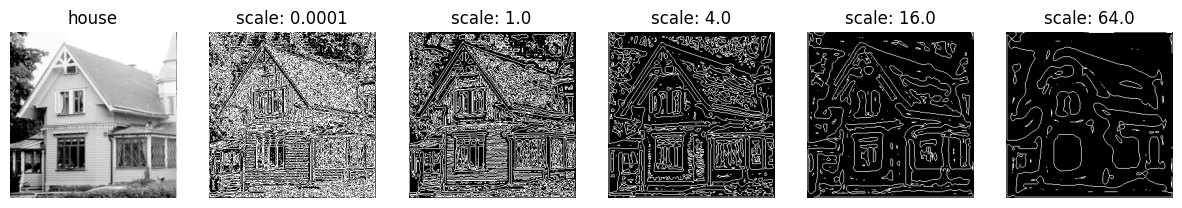

In [59]:
house = np.load("Images-npy/godthem256.npy")
scales = [.0001, 1., 4., 16., 64.]

plt.figure(figsize=(15,5))
plt.subplot(1,len(scales)+1,1)
showgrey(house, False)
plt.title('house')
for i,scale in enumerate(scales):
    plt.subplot(1,len(scales)+1,i+2)
    showgrey(contour(Lvvtilde(discgaussfft(house, scale), 'same')), False)
    plt.title('scale: ' + str(scale) )
plt.show()

What we can observe wrt to first derivatives is that in this case even thin edges are retained, but as soon as the scale increases, they disappear, due to the smoothing. What we are looking at is the 2nd derivative $L_{vv}=0$, where we can easily spot lot of zero-crossings values. The smoothing is reducing those zero-crossing values but is also dropping important details about the edges, which at larger smoothing scales look distorted (e.g. scale 64).

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


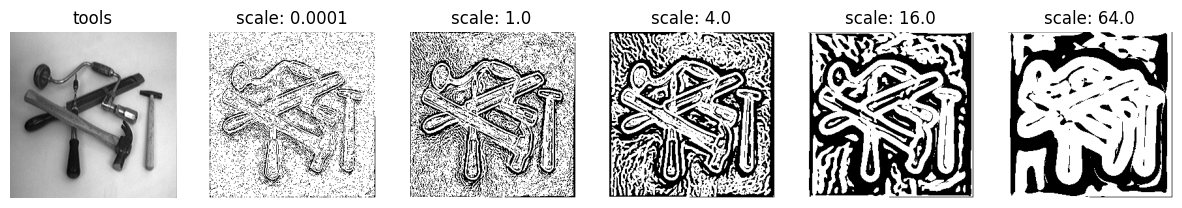

In [60]:
tools = np.load("Images-npy/few256.npy")
scales = [.0001, 1., 4., 16., 64.]

plt.figure(figsize=(15,5))
plt.subplot(1,len(scales)+1,1)
showgrey(tools, False)
plt.title('tools')
for i,scale in enumerate(scales):
    plt.subplot(1,len(scales)+1,i+2)
    showgrey((Lvvvtilde(discgaussfft(tools, scale), 'same')<0).astype(int), False)
    plt.title('scale: ' + str(scale) )
plt.show()


We are now considering the 3rd derivative instead of the 2nd, thus we are now looking for $L_{vvv}<0$. Lot of noise is present in the image, and even by smoothing is not possible to reduce it. Increasing the scale too much mess up with the edges, but we are not loosing them.

## 5. Extraction of edge segments

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


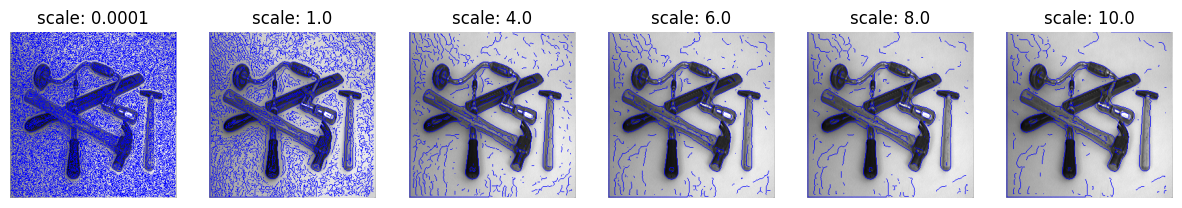

In [61]:
# tools
inpic = np.load("Images-npy/few256.npy")
scales = [.0001, 1., 4., 6., 8., 10.]# 16., 64.]
threshold = 5

plt.figure(figsize=(15,5))
for i,scale in enumerate(scales):
    contours = extractedge(inpic, scale, threshold)
    plt.subplot(1,len(scales),i+1)
    edgecurves = extractedge(inpic, scale, threshold)
    overlaycurves(inpic, edgecurves)
    plt.title('scale: ' + str(scale) )

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


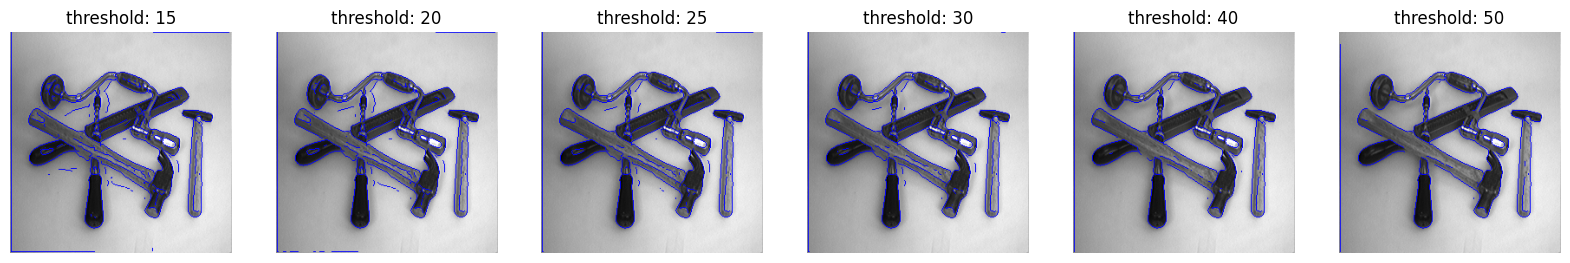

In [62]:
# tools
inpic = np.load("Images-npy/few256.npy")
scale = 4
threshold = [15, 20, 25, 30, 40, 50]

plt.figure(figsize=(20,5))
for i,t in enumerate(threshold):
    contours = extractedge(inpic, scale, t)
    plt.subplot(1,len(threshold),i+1)
    edgecurves = extractedge(inpic, scale, t)
    overlaycurves(inpic, edgecurves)
    plt.title('threshold: ' + str(t) )

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


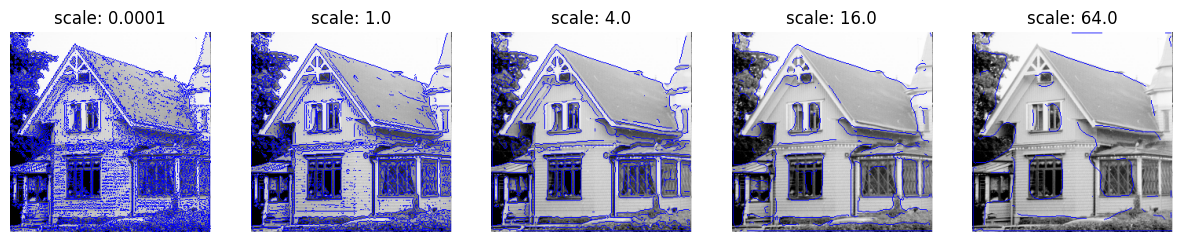

In [63]:
inpic = np.load("Images-npy/godthem256.npy")
scales = [.0001, 1., 4., 16., 64.]
threshold = 20

plt.figure(figsize=(15,5))
for i,scale in enumerate(scales):
    contours = extractedge(inpic, scale, threshold)
    plt.subplot(1,len(scales),i+1)
    edgecurves = extractedge(inpic, scale, threshold)
    overlaycurves(inpic, edgecurves)
    plt.title('scale: ' + str(scale) )

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


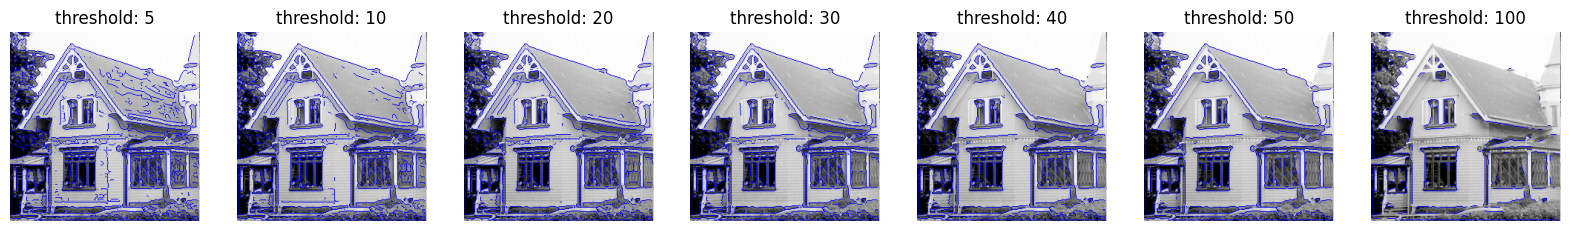

In [64]:
inpic = np.load("Images-npy/godthem256.npy")
scale = 4
threshold = [ 5, 10, 20, 30, 40, 50, 100]

plt.figure(figsize=(20,5))
for i,t in enumerate(threshold):
    contours = extractedge(inpic, scale, t)
    plt.subplot(1,len(threshold),i+1)
    edgecurves = extractedge(inpic, scale, t)
    overlaycurves(inpic, edgecurves)
    plt.title('threshold: ' + str(t) )

Question 7: Present your best results obtained with extractedge() for house and tools

## 6. Hough transform

In [65]:
edgecurves

(array([  1,   1,   1, ..., 254, 254, 254], dtype=int64),
 array([ 10,  11,  16, ..., 251, 252, 253], dtype=int64))

(128, 128) (128, 128) (128, 128)
(128, 128) (128, 128) (128, 128)


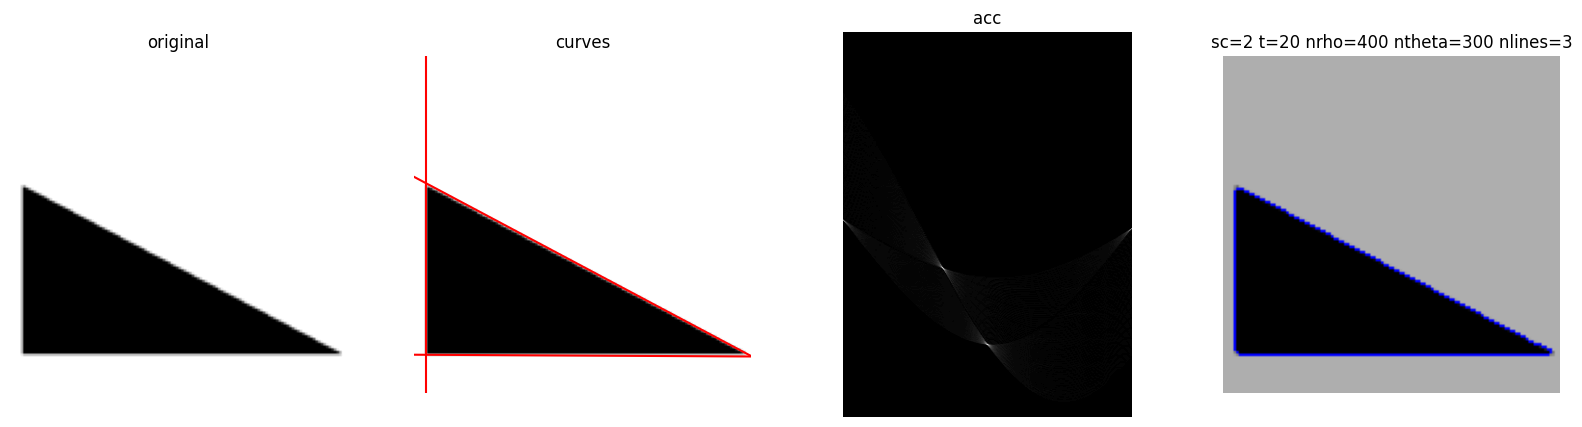

In [66]:
testimage1 = np.load("Images-npy/triangle128.npy")
linepar, acc = houghedgeline(testimage1, 2, 20, 400, 300, 3, True)

In [67]:
# compute time for houghedgeline for different number of cells
#import time
#testimage1 = np.load("Images-npy/triangle128.npy")
#for i in range(1, 10):
#    start_time = time.time()
#    linepar, acc = houghedgeline(testimage1, 2, 20, 100*i, 100, 3, True)
#    print("time: " + str(time.time() - start_time))

In [68]:
# compute time for houghedgeline for different number of cells
#import time
#testimage1 = np.load("Images-npy/triangle128.npy")
#for i in range(1, 10):
#    start_time = time.time()
#    linepar, acc = houghedgeline(testimage1, 2, 20, 100, i*100, 3, True)
#    print("time: " + str(time.time() - start_time))


[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
(64, 64) (64, 64) (64, 64)
(64, 64) (64, 64) (64, 64)


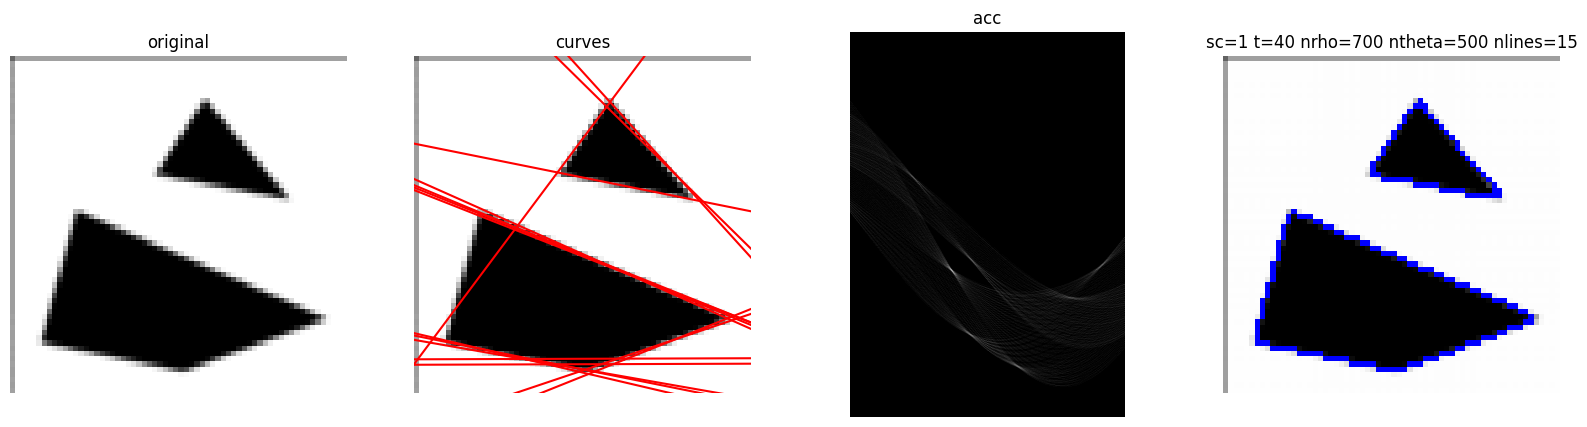

In [69]:
testimage1 = np.load("Images-npy/triangle128.npy")
smalltest1 = binsubsample(testimage1)
#linepar, acc = houghedgeline(smalltest1, 2, 20, 400, 300, 3, True)
testimage2 = np.load("Images-npy/houghtest256.npy")
smalltest2 = binsubsample(binsubsample(testimage2))
linepar, acc = houghedgeline(smalltest2, 1, 40, 700, 500, 15, True)

(256, 256) (256, 256) (256, 256)
(256, 256) (256, 256) (256, 256)


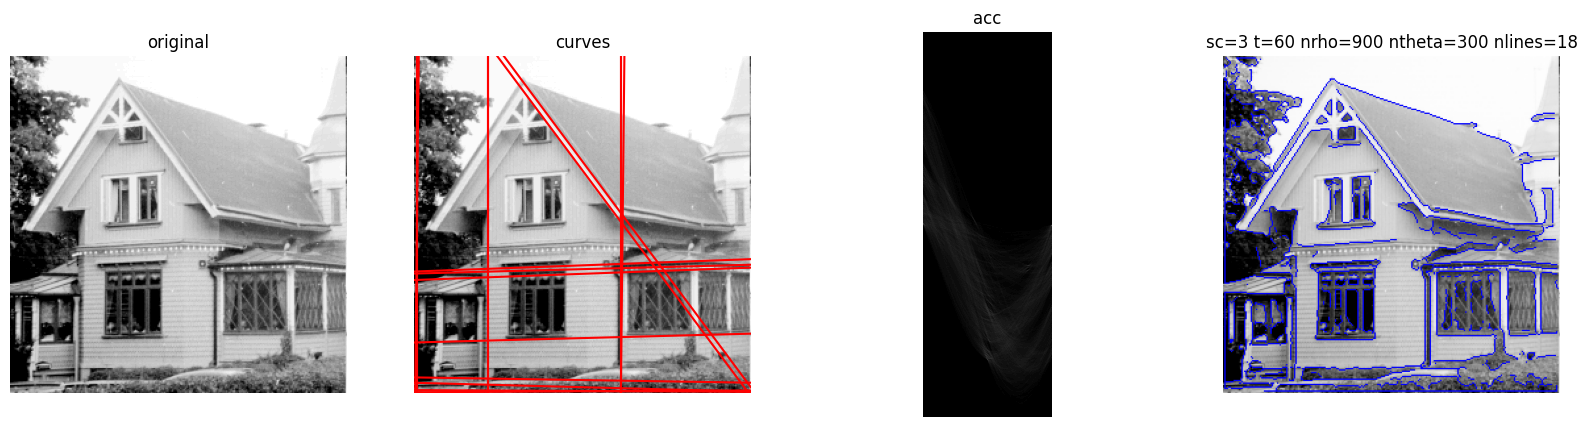

([[-50.33908119681763, -0.929869397467213],
  [159.07149658194368, 1.560289327953459],
  [163.09862307768907, 0.03677449594503113],
  [169.5420254708818, 0.03677449594503113],
  [217.06211812067755, 0.026267497103593662],
  [-54.36620769256302, -0.929869397467213],
  [243.64115299259737, -0.015760498262156197],
  [-156.65522068449644, -1.5707963267948966],
  [156.65522068449644, 1.5707963267948966],
  [247.66827948834276, -0.026267497103593662],
  [55.1716329917121, 1.5707963267948966],
  [-55.1716329917121, -1.5707963267948966],
  [2.8189885470217746, 1.560289327953459],
  [164.70947367598723, 0.026267497103593662],
  [254.91710718068447, 0.0052534994207187324],
  [253.3062565823863, -0.0052534994207187324],
  [-1.2081379487236177, -1.5707963267948966],
  [1.2081379487236177, 1.5707963267948966]],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., 

In [70]:
houghedgeline(house,3,60,900,300,18,True)